# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
pd.set_option('display.max_columns', 100) # max column to be shown

# plot style

In [4]:
print(plt.style.available) # to choose plot style


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


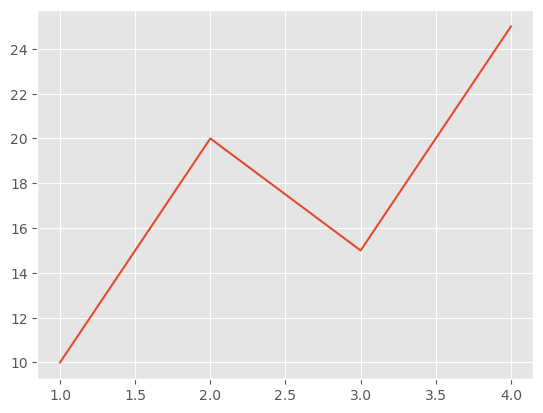

In [8]:
#test ggplot style
plt.style.use("ggplot")
plt.plot([1, 2, 3, 4], [10, 20, 15, 25])
plt.show()

In [10]:
plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Load Dataset and Perform Initial Processing

In [13]:
file_path = r"C:\Users\Sara\Downloads\tweet\tweets.csv"
print(os.path.exists(file_path))   # should be True
wordle_tweet=pd.read_csv(file_path)

True


In [14]:
wordle_tweet.shape

(1178454, 5)

In [15]:
wordle_tweet.dtypes

wordle_id          int64
tweet_id           int64
tweet_date        object
tweet_username    object
tweet_text        object
dtype: object

## Ensure Proper Date Format for tweet_date

In [17]:
wordle_tweet['tweet_date']=pd.to_datetime(wordle_tweet['tweet_date'])
wordle_tweet.dtypes

wordle_id                       int64
tweet_id                        int64
tweet_date        datetime64[ns, UTC]
tweet_username                 object
tweet_text                     object
dtype: object

In [18]:
wordle_tweet['tweet_date'] = pd.to_datetime(wordle_tweet['tweet_date']).dt.floor('d')

## Parsing Wordle Results from Tweet Text

In [20]:
wordle_tweet['wordle_level']=wordle_tweet['tweet_text'].str[:10]
wordle_tweet['No_trials']=wordle_tweet['tweet_text'].str[11]

In [21]:
wordle_tweet.dtypes

wordle_id                       int64
tweet_id                        int64
tweet_date        datetime64[ns, UTC]
tweet_username                 object
tweet_text                     object
wordle_level                   object
No_trials                      object
dtype: object

# Insights from the Data (Q&A)


## How many Wordle tweets are posted per day?

In [24]:
tweets_per_day=wordle_tweet.groupby('tweet_date').size()
tweets_per_day

tweet_date
2022-01-16 00:00:00+00:00    2730
2022-01-17 00:00:00+00:00    2830
2022-01-18 00:00:00+00:00    2365
2022-01-19 00:00:00+00:00    2121
2022-01-20 00:00:00+00:00    2694
                             ... 
2022-11-17 00:00:00+00:00    3203
2022-11-18 00:00:00+00:00    2826
2022-11-19 00:00:00+00:00    3308
2022-11-20 00:00:00+00:00    3054
2022-11-21 00:00:00+00:00     144
Length: 308, dtype: int64

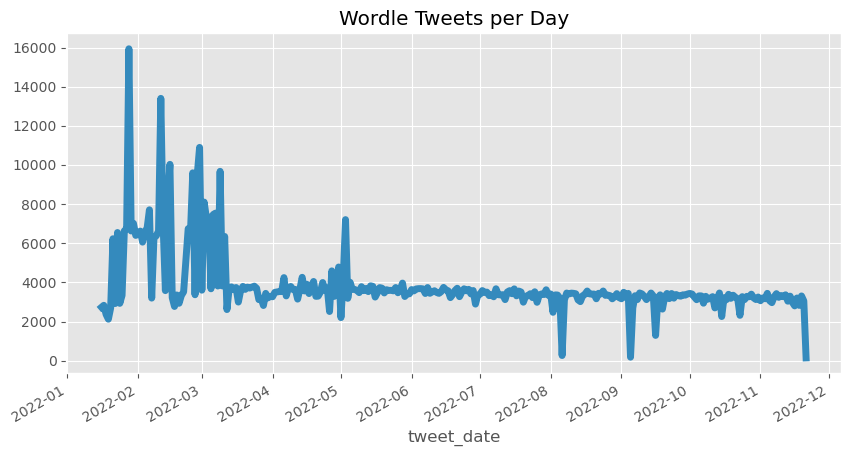

In [28]:
tweets_per_day.plot(figsize=(10,5), title='Wordle Tweets per Day',
              color=color_pal[1], lw=5)
plt.show()

## What days of the week see the most tweets?

In [30]:
wordle_tweet['day_name'] = wordle_tweet['tweet_date'].dt.day_name()

In [31]:
Tweets_per_Day_of_Week=wordle_tweet.groupby('day_name').size()
Tweets_per_Day_of_Week

day_name
Friday       190451
Monday       165554
Saturday     157782
Sunday       166726
Thursday     165137
Tuesday      159604
Wednesday    173200
dtype: int64

<Axes: title={'center': 'Tweets per Day of the Week'}, xlabel='day_name'>

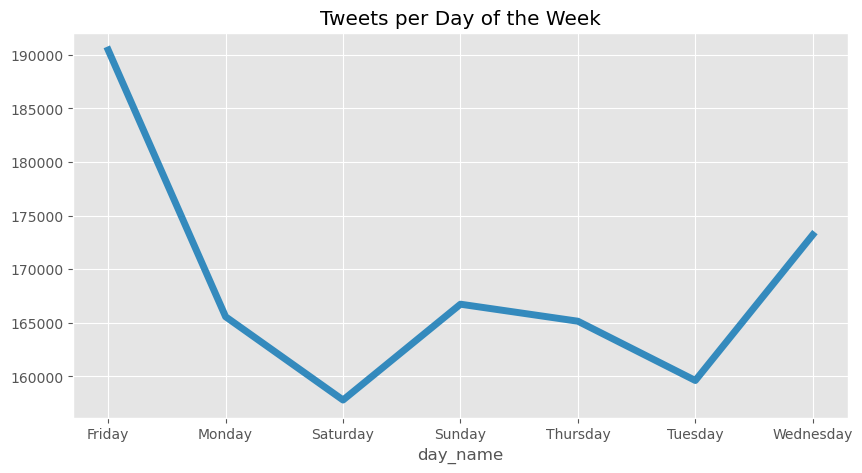

In [32]:
Tweets_per_Day_of_Week.plot(figsize=(10, 5),title="Tweets per Day of the Week",lw='5',color=color_pal[1])

## What is the distribution of number of attempts (n_attempts) people need to solve Wordle?

In [38]:
wordle_tweet.dtypes

wordle_id                       int64
tweet_id                        int64
tweet_date        datetime64[ns, UTC]
tweet_username                 object
tweet_text                     object
wordle_level                   object
No_trials                      object
day_name                       object
dtype: object

In [42]:
No_trials_vs_level=wordle_tweet.groupby('wordle_level')['No_trials'].value_counts().unstack()
No_trials_vs_level=pd.crosstab(wordle_tweet['wordle_level'],wordle_tweet['No_trials']).style.background_gradient(axis=1)
No_trials_vs_level

No_trials,2,3,4,5,6
wordle_level,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


## Does performance (attempts to solve) change over different Wordle IDs (puzzles)?

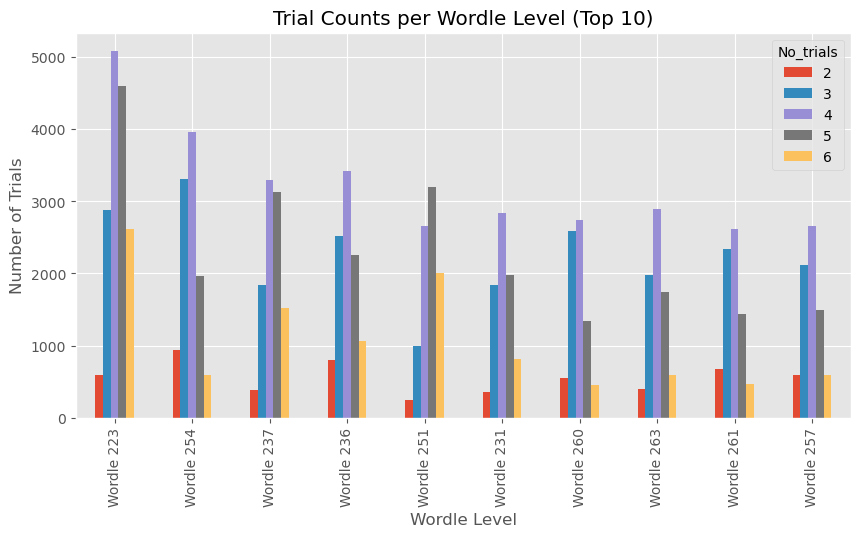

In [48]:
Performance_by_Wordle=wordle_tweet.groupby('wordle_level')['No_trials'].value_counts().unstack()
top10_levels = Performance_by_Wordle.sum(axis=1).nlargest(10).index
No_trials_vs_level_top10 = Performance_by_Wordle.loc[top10_levels]
No_trials_vs_level_top10.plot(
    kind='bar',
    figsize=(10, 5),
    title="Trial Counts per Wordle Level (Top 10)",
    lw=5,
    color=color_pal
)
plt.xlabel('Wordle Level')
plt.ylabel('Number of Trials')
plt.show()

## What is the typical number of attempts needed to solve it?

In [51]:
No_attemps=wordle_tweet['No_trials'].value_counts().sort_index()
No_attemps

No_trials
2     69260
3    275860
4    405714
5    292143
6    135477
Name: count, dtype: int64

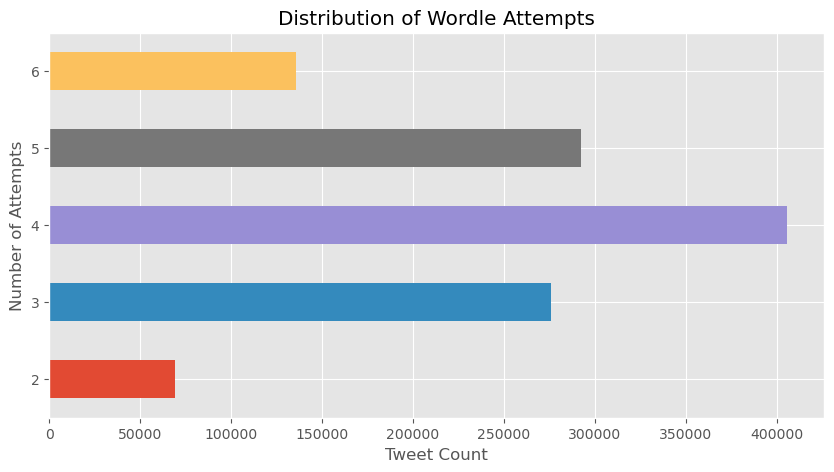

In [53]:
No_attemps.plot(figsize=(10,5),color=color_pal,kind='barh')
plt.xlabel('Tweet Count')
plt.ylabel('Number of Attempts')
plt.title('Distribution of Wordle Attempts') 
plt.show()


## How does solving accuracy (green %) change across Wordle puzzles?

In [61]:
def analyze_guess(row):
    return {
        "greens": row.count("🟩"),
        "yellows": row.count("🟨"),
        "blacks": row.count("⬛") + row.count("⬜")
    }

wordle_tweet["guess_stats"] = wordle_tweet["tweet_text"].apply(analyze_guess)

In [63]:
wordle_tweet

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,wordle_level,No_trials,day_name,guess_stats
0,210,1482553374591660037,2022-01-16 00:00:00+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 8, 'yellows': 3, 'blacks': 9}"
1,210,1482553387937898499,2022-01-16 00:00:00+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 10, 'yellows': 3, 'blacks': 7}"
2,210,1482553422276698113,2022-01-16 00:00:00+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 7, 'yellows': 3, 'blacks': 10}"
3,210,1482553436910628866,2022-01-16 00:00:00+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 5, 'yellows': 3, 'blacks': 7}"
4,210,1482553445726908420,2022-01-16 00:00:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 8, 'yellows': 1, 'blacks': 6}"
...,...,...,...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21 00:00:00+00:00,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩,Wordle 519,2,Monday,"{'greens': 6, 'yellows': 2, 'blacks': 2}"
1178450,519,1594492932115124226,2022-11-21 00:00:00+00:00,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 10, 'yellows': 2, 'blacks': 3}"
1178451,519,1594493005192658944,2022-11-21 00:00:00+00:00,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 12, 'yellows': 0, 'blacks': 3}"
1178452,519,1594493051824754689,2022-11-21 00:00:00+00:00,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...,Wordle 519,3,Monday,"{'greens': 11, 'yellows': 1, 'blacks': 3}"


In [107]:
#guess_df = wordle_tweet["guess_stats"].apply(pd.Series)
guess_df

,greens,yellows,blacks
0,8,3,9
1,10,3,7
2,7,3,10
3,5,3,7
4,8,1,6
...,...,...,...
1178449,6,2,2
1178450,10,2,3
1178451,12,0,3
1178452,11,1,3


In [109]:
wordle_tweet = pd.concat([wordle_tweet, guess_df], axis=1)

In [111]:
wordle_tweet

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,wordle_level,No_trials,day_name,guess_stats,greens_progress,greens,yellows,blacks
0,210,1482553374591660037,2022-01-16 00:00:00+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 8, 'yellows': 3, 'blacks': 9}","[0, 0, 0, 1, 2, 5]",8,3,9
1,210,1482553387937898499,2022-01-16 00:00:00+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 10, 'yellows': 3, 'blacks': 7}","[0, 0, 0, 2, 3, 5]",10,3,7
2,210,1482553422276698113,2022-01-16 00:00:00+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 7, 'yellows': 3, 'blacks': 10}","[0, 0, 0, 1, 1, 5]",7,3,10
3,210,1482553436910628866,2022-01-16 00:00:00+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 5, 'yellows': 3, 'blacks': 7}","[0, 0, 0, 0, 5]",5,3,7
4,210,1482553445726908420,2022-01-16 00:00:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 8, 'yellows': 1, 'blacks': 6}","[0, 0, 0, 3, 5]",8,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21 00:00:00+00:00,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩,Wordle 519,2,Monday,"{'greens': 6, 'yellows': 2, 'blacks': 2}","[0, 0, 1, 5]",6,2,2
1178450,519,1594492932115124226,2022-11-21 00:00:00+00:00,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 10, 'yellows': 2, 'blacks': 3}","[0, 0, 1, 4, 5]",10,2,3
1178451,519,1594493005192658944,2022-11-21 00:00:00+00:00,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 12, 'yellows': 0, 'blacks': 3}","[0, 0, 3, 4, 5]",12,0,3
1178452,519,1594493051824754689,2022-11-21 00:00:00+00:00,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...,Wordle 519,3,Monday,"{'greens': 11, 'yellows': 1, 'blacks': 3}","[0, 0, 2, 4, 5, 0, 0]",11,1,3


In [119]:
wordle_tweet['correct_guess']=round((wordle_tweet["greens"]/(wordle_tweet["blacks"]+wordle_tweet["yellows"]+wordle_tweet["greens"]))*100,2)
wordle_tweet

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,wordle_level,No_trials,day_name,guess_stats,greens_progress,greens,yellows,blacks,correct_guess
0,210,1482553374591660037,2022-01-16 00:00:00+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 8, 'yellows': 3, 'blacks': 9}","[0, 0, 0, 1, 2, 5]",8,3,9,40.00
1,210,1482553387937898499,2022-01-16 00:00:00+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 10, 'yellows': 3, 'blacks': 7}","[0, 0, 0, 2, 3, 5]",10,3,7,50.00
2,210,1482553422276698113,2022-01-16 00:00:00+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 7, 'yellows': 3, 'blacks': 10}","[0, 0, 0, 1, 1, 5]",7,3,10,35.00
3,210,1482553436910628866,2022-01-16 00:00:00+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 5, 'yellows': 3, 'blacks': 7}","[0, 0, 0, 0, 5]",5,3,7,33.33
4,210,1482553445726908420,2022-01-16 00:00:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 8, 'yellows': 1, 'blacks': 6}","[0, 0, 0, 3, 5]",8,1,6,53.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21 00:00:00+00:00,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩,Wordle 519,2,Monday,"{'greens': 6, 'yellows': 2, 'blacks': 2}","[0, 0, 1, 5]",6,2,2,60.00
1178450,519,1594492932115124226,2022-11-21 00:00:00+00:00,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 10, 'yellows': 2, 'blacks': 3}","[0, 0, 1, 4, 5]",10,2,3,66.67
1178451,519,1594493005192658944,2022-11-21 00:00:00+00:00,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 12, 'yellows': 0, 'blacks': 3}","[0, 0, 3, 4, 5]",12,0,3,80.00
1178452,519,1594493051824754689,2022-11-21 00:00:00+00:00,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...,Wordle 519,3,Monday,"{'greens': 11, 'yellows': 1, 'blacks': 3}","[0, 0, 2, 4, 5, 0, 0]",11,1,3,73.33


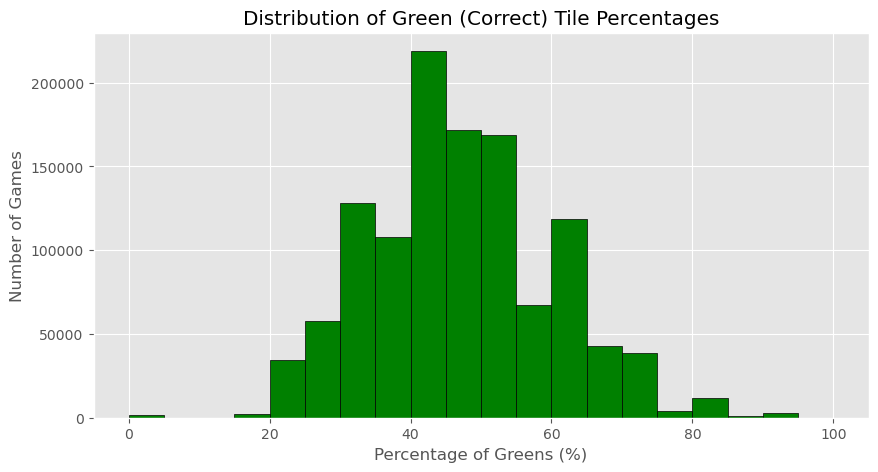

In [125]:
plt.figure(figsize=(10,5))
wordle_tweet["correct_guess"].plot(
    kind="hist", bins=20, color="green", edgecolor="black"
)
plt.title("Distribution of Green (Correct) Tile Percentages")
plt.xlabel("Percentage of Greens (%)")
plt.ylabel("Number of Games")
plt.show()

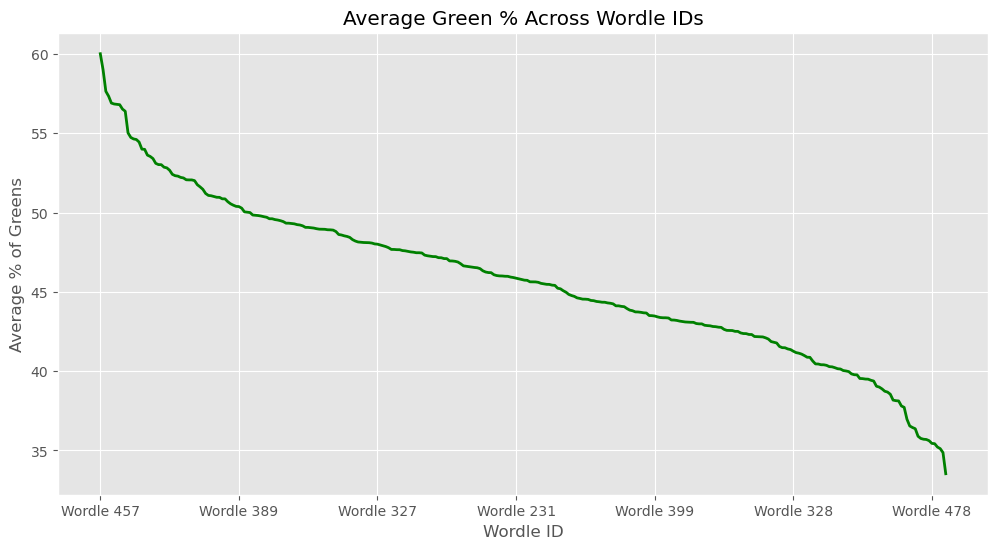

In [131]:
green_by_level = (
    wordle_tweet.groupby("wordle_level")["correct_guess"]
    .mean()
    .sort_values(ascending=False)
)
green_by_level.plot(figsize=(12,6), lw=2, color="green")
plt.title("Average Green % Across Wordle IDs")
plt.ylabel("Average % of Greens")
plt.xlabel("Wordle ID")
plt.show()

## How many correct letters (greens) do players gain per attempt on average?

In [136]:
def extract_greens(tweet):
    # Split by newline → each attempt
    attempts = tweet.split("\n")
    
    greens_per_attempt = []
    for attempt in attempts:
        greens = attempt.count("🟩")  # count greens in this attempt
        greens_per_attempt.append(greens)
    
    return greens_per_attempt

# Apply to your DataFrame
wordle_tweet["greens_progress"] = wordle_tweet["tweet_text"].apply(extract_greens)

In [137]:
wordle_tweet

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,wordle_level,No_trials,day_name,guess_stats,greens_progress,greens,yellows,blacks,correct_guess
0,210,1482553374591660037,2022-01-16 00:00:00+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 8, 'yellows': 3, 'blacks': 9}","[0, 0, 0, 1, 2, 5]",8,3,9,40.00
1,210,1482553387937898499,2022-01-16 00:00:00+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 10, 'yellows': 3, 'blacks': 7}","[0, 0, 0, 2, 3, 5]",10,3,7,50.00
2,210,1482553422276698113,2022-01-16 00:00:00+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,Wordle 210,4,Sunday,"{'greens': 7, 'yellows': 3, 'blacks': 10}","[0, 0, 0, 1, 1, 5]",7,3,10,35.00
3,210,1482553436910628866,2022-01-16 00:00:00+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 5, 'yellows': 3, 'blacks': 7}","[0, 0, 0, 0, 5]",5,3,7,33.33
4,210,1482553445726908420,2022-01-16 00:00:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,Wordle 210,3,Sunday,"{'greens': 8, 'yellows': 1, 'blacks': 6}","[0, 0, 0, 3, 5]",8,1,6,53.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21 00:00:00+00:00,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩,Wordle 519,2,Monday,"{'greens': 6, 'yellows': 2, 'blacks': 2}","[0, 0, 1, 5]",6,2,2,60.00
1178450,519,1594492932115124226,2022-11-21 00:00:00+00:00,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 10, 'yellows': 2, 'blacks': 3}","[0, 0, 1, 4, 5]",10,2,3,66.67
1178451,519,1594493005192658944,2022-11-21 00:00:00+00:00,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Wordle 519,3,Monday,"{'greens': 12, 'yellows': 0, 'blacks': 3}","[0, 0, 3, 4, 5]",12,0,3,80.00
1178452,519,1594493051824754689,2022-11-21 00:00:00+00:00,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...,Wordle 519,3,Monday,"{'greens': 11, 'yellows': 1, 'blacks': 3}","[0, 0, 2, 4, 5, 0, 0]",11,1,3,73.33


In [83]:
attempts = wordle_tweet["tweet_text"].apply(lambda t: t.split("\n"))
attempts

0             [Wordle 210 4/6, , ⬛⬛🟨🟨⬛, 🟩⬛⬛⬛⬛, 🟩🟩🟨⬛⬛, 🟩🟩🟩🟩🟩]
1             [Wordle 210 4/6, , ⬜⬜⬜⬜⬜, 🟩🟩🟨🟨⬜, 🟩🟩⬜🟩🟨, 🟩🟩🟩🟩🟩]
2             [Wordle 210 4/6, , ⬜⬜⬜🟨⬜, ⬜🟩⬜🟨⬜, ⬜🟩⬜🟨⬜, 🟩🟩🟩🟩🟩]
3                    [Wordle 210 3/6, , ⬜⬜🟨⬜⬜, 🟨🟨⬜⬜⬜, 🟩🟩🟩🟩🟩]
4                    [Wordle 210 3/6, , ⬛⬛🟨⬛⬛, 🟩🟩🟩⬛⬛, 🟩🟩🟩🟩🟩]
                                 ...                        
1178449                     [Wordle 519 2/6, , ⬜🟩🟨🟨⬜, 🟩🟩🟩🟩🟩]
1178450              [Wordle 519 3/6, , ⬜🟨🟩🟨⬜, ⬜🟩🟩🟩🟩, 🟩🟩🟩🟩🟩]
1178451              [Wordle 519 3/6, , ⬛🟩🟩⬛🟩, 🟩🟩🟩⬛🟩, 🟩🟩🟩🟩🟩]
1178452    [Wordle 519 3/6, , 🟨🟩⬜⬜🟩, 🟩🟩🟩⬜🟩, 🟩🟩🟩🟩🟩, , I pl...
1178453    [Wordle 519 2/6, , 🟨🟨⬜⬜🟩, 🟩🟩🟩🟩🟩, , ⁦@ScoreMyWo...
Name: tweet_text, Length: 1178454, dtype: object

In [91]:
from collections import defaultdict

attempts_summary = defaultdict(list)

for greens_list in wordle_tweet["greens_progress"]:
    for attempt_num, greens in enumerate(greens_list, start=1):
        attempts_summary[attempt_num].append(greens)

# Convert to DataFrame
greens_df = pd.DataFrame({
    "attempt": list(attempts_summary.keys()),
    "avg_greens": [sum(v)/len(v) for v in attempts_summary.values()]
})
greens_df

,attempt,avg_greens
0,1,0.000000
1,2,0.000000
2,3,0.486045
3,4,1.392042
4,5,2.646509
5,6,3.501294
6,7,3.693163
7,8,3.223999
8,9,0.015180
9,10,0.052703


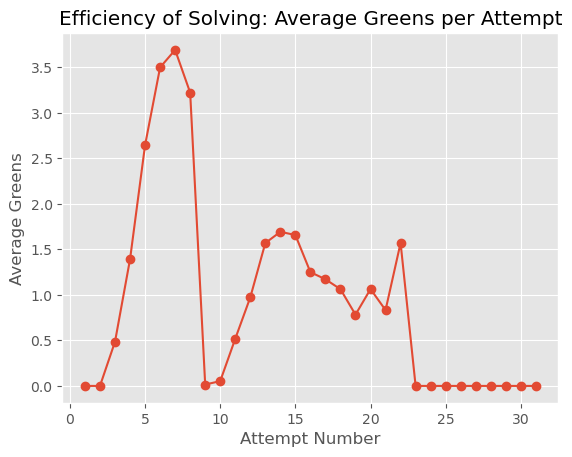

In [93]:
plt.plot(greens_df["attempt"], greens_df["avg_greens"], marker="o")
plt.xlabel("Attempt Number")
plt.ylabel("Average Greens")
plt.title("Efficiency of Solving: Average Greens per Attempt")
plt.show()